In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

In [2]:
advertise = pd.read_csv('advertising.csv')
advertise

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
X = advertise[['TV','Radio','Newspaper']].values
TV = advertise[['TV']].values
Radio = advertise[['Radio']].values
Newspaper = advertise[['Newspaper']].values
Sales = advertise[['Sales']].values

X_train,X_test,Sales_train,Sales_test = train_test_split(X,Sales,test_size=0.2,random_state=42)

TV_train,TV_test,Sales_train,Sales_test = train_test_split(TV,Sales,test_size=0.2,random_state=42)
Radio_train,Radio_test,Sales_train,Sales_test = train_test_split(Radio,Sales,test_size=0.2,random_state=42)
Newspaper_train,Newspaper_test,Sales_train,Sales_test = train_test_split(Newspaper,Sales,test_size=0.2,random_state=42)

scaler = StandardScaler()
Sales_train = scaler.fit_transform(Sales_train)
Sales_test = scaler.fit_transform(Sales_test)
TV_train = scaler.fit_transform(TV_train)
TV_test = scaler.fit_transform(TV_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

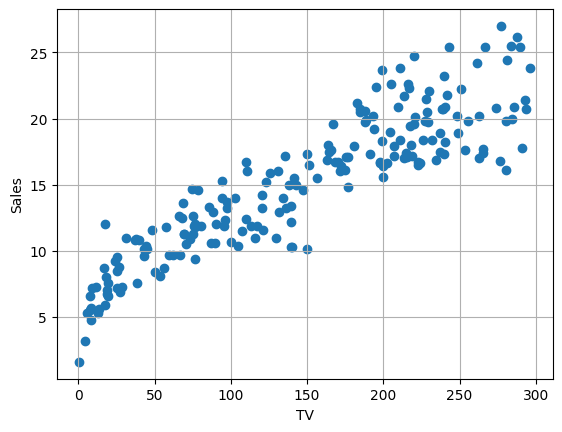

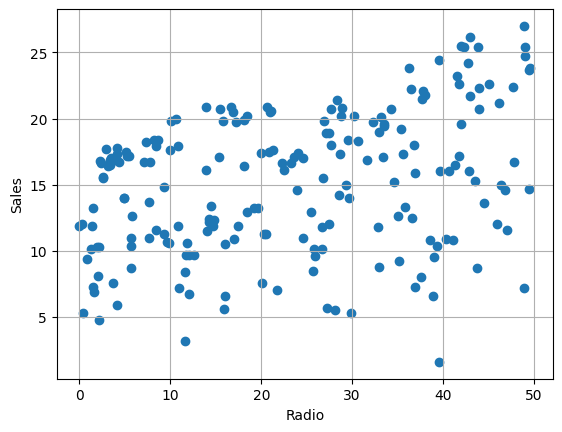

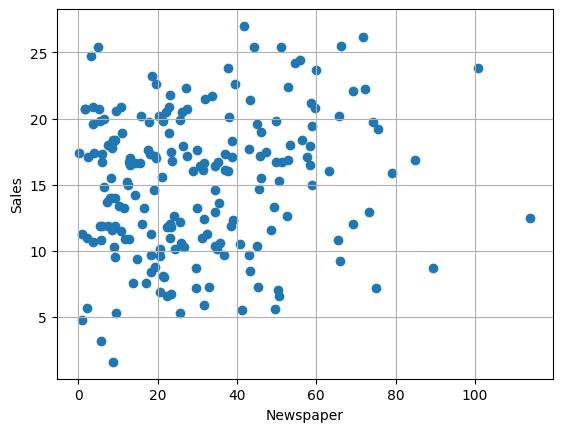

In [4]:
plt.scatter(TV,Sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

plt.scatter(Radio,Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

plt.scatter(Newspaper,Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

R2 Score for Linear Regression Model is :  0.8035496390150704
Coefficient :  0.9019349225254149
Intercept :  -6.647177842339487e-18


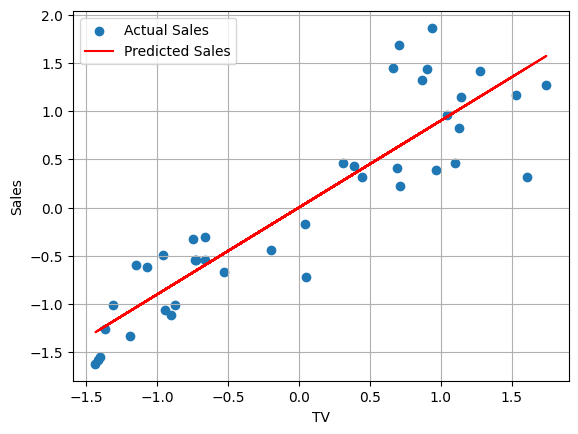

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(TV_train,Sales_train)

y_pred = lin_reg.predict(TV_test)
R2_score = r2_score(Sales_test,y_pred)
print("R2 Score for Linear Regression Model is : ",R2_score)
print("Coefficient : ",lin_reg.coef_[0][0])
print("Intercept : ",lin_reg.intercept_[0])

plt.scatter(TV_test,Sales_test,label='Actual Sales')
plt.plot(TV_test,y_pred,label='Predicted Sales',color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
pipeline.fit(X_train, Sales_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [7]:
y_pred_pipeline = pipeline.predict(X_test)
pipeline_r2_score = r2_score(Sales_test, y_pred_pipeline)
print("R2 Score with Pipeline:", pipeline_r2_score)

R2 Score with Pipeline: 0.9620049542867256


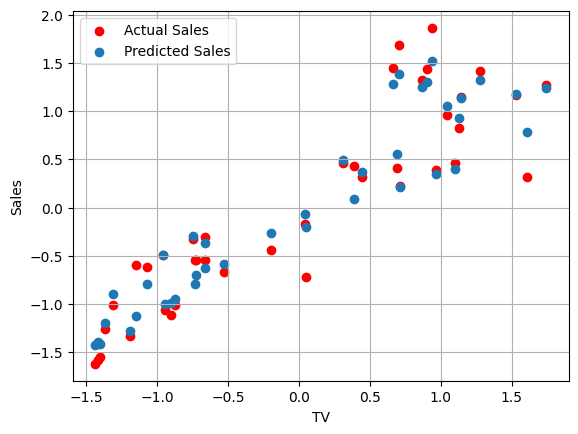

In [8]:
plt.scatter(X_test[:,0],Sales_test,label='Actual Sales',color='red')
plt.scatter(X_test[:,0],y_pred_pipeline,label='Predicted Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
ridge_reg = pipeline.named_steps['ridge']
ridge_reg.coef_,ridge_reg.intercept_

(array([[ 0.        ,  0.86076652,  0.28888775,  0.01261862, -0.14426054,
          0.09998503, -0.00807595,  0.06064219,  0.00905794,  0.00747471]]),
 array([0.06739617]))